# Programmentwurf Data Science Prototyp v1.0

Es ist ein stark vereinfachter und abgeänderter Hausdatensatz gegeben, 
in dem 17 verschiedene Merkmale von Häusern gegeben sind mit 900 Datenpunkten 
sowie eine Beschreibung der 17 Merkmale. 
Andere Merkmale sind ausdrücklich nicht Teil der Aufgabe.

Matrikelnummern: 9916444

## Struktur der Daten

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotArea: Lot size in square feet

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	    Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	    Hip
       Mansard	Mansard
       Shed	    Shed
		
TotalBsmtSF: Total square feet of basement area

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
GrLivArea: Above grade (ground) living area square feet
      	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
	
GarageCars: Size of garage in car capacity

YrSold: Year Sold (YYYY)


### Teil 1 (8 + 5 P):
Der Datensatz ist mit Hilfe statistischer Standardfunktionen zu analysieren, zu interpretieren und ggfs. zu bereinigen. Nutzen Sie visuelle, in die Programmierumgebung eingebettete Darstellungsarten, um wichtige Zusammenhänge zu visualisieren. Beschreiben Sie die Ergebnisse.

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
#import matplotlib
%matplotlib inline 

# Seaborn customice visualisation
sns.set(style="white", palette="muted", color_codes=True) 

print('Python Verison: ', sys.version)  # parentheses necessary in python 3.
print('Pandas Version: ', pd.__version__)
print('Numpy Version: ', np.__version__)
print('Seaborn Version: ', sns.__version__)
#print('Matplotlib Version: ', matplotlib.__version__)

Python Verison:  3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Pandas Version:  0.25.1
Numpy Version:  1.16.5
Seaborn Version:  0.10.0


In [2]:
df = pd.read_csv('SetFiltered.csv', delimiter=";")
df.head()

,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
0,RL,9590,Timber,1Fam,7,5,2003,2003,Gable,868,Ex,Y,1146,6,2,2007,187500
1,RL,12256,NoRidge,1Fam,8,5,1994,1995,Gable,1463,Ex,Y,2622,9,2,2010,325000
2,RL,12108,Edwards,Duplex,4,4,1955,1955,Gable,1440,TA,N,1440,8,0,2008,118000
3,RL,7500,Sawyer,1Fam,5,5,1963,1963,Gable,1040,Fa,Y,1040,5,1,2010,133000
4,RM,6000,OldTown,2fmCon,4,4,1953,1953,Gable,936,TA,N,936,4,2,2009,93000


In [3]:
df = df.sort_values(by=['LotArea'], ascending=True)
df.head()

,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
726,RM,1300,Blueste,TwnhsE,6,6,1980,1980,Gable,561,TA,Y,1229,5,2,2009,124000
469,RM,1477,MeadowV,TwnhsE,4,4,1970,1970,Gable,630,TA,Y,630,3,1,2009,80000
825,RM,1491,MeadowV,TwnhsE,4,6,1972,1972,Gable,630,Ex,Y,630,3,0,2010,75500
122,RM,1526,MeadowV,Twnhs,4,8,1970,2002,Gable,630,TA,Y,630,3,1,2009,86000
136,RM,1596,MeadowV,Twnhs,4,5,1973,1973,Gable,462,TA,Y,988,5,1,2009,91000


In [4]:
# Checking the datatypes
df.dtypes

MSZoning        object
LotArea          int64
Neighborhood    object
BldgType        object
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle       object
TotalBsmtSF      int64
HeatingQC       object
CentralAir      object
GrLivArea        int64
TotRmsAbvGrd     int64
GarageCars       int64
YrSold           int64
SalePrice        int64
dtype: object

In [5]:
# renaming columns 
df = df.rename(columns={"HeatingQC": "Heating Quality and Condition","BldgType": "Dwelling Type", "RoofStyle":"Roof Style", "MSZoning":"Zoning Classification", "LotArea": "Lot Area", "OverallQual":"Overall Quality", "OverallCond":"Overall Condition","YearBuilt":"Year Built", "TotalBsmtSF":"Basement Area SF", "YearRemodAdd": "Remodel Date", "GrLivArea": "Ground Area SF", "TotRmsAbvGrd": "Total Rooms above Grade", "YrSold": "Year Sold", "GarageCars": "Garage Cars", "SalePrice": "Sale Price"})
df.head()

,Zoning Classification,Lot Area,Neighborhood,Dwelling Type,Overall Quality,Overall Condition,Year Built,Remodel Date,Roof Style,Basement Area SF,Heating Quality and Condition,CentralAir,Ground Area SF,Total Rooms above Grade,Garage Cars,Year Sold,Sale Price
726,RM,1300,Blueste,TwnhsE,6,6,1980,1980,Gable,561,TA,Y,1229,5,2,2009,124000
469,RM,1477,MeadowV,TwnhsE,4,4,1970,1970,Gable,630,TA,Y,630,3,1,2009,80000
825,RM,1491,MeadowV,TwnhsE,4,6,1972,1972,Gable,630,Ex,Y,630,3,0,2010,75500
122,RM,1526,MeadowV,Twnhs,4,8,1970,2002,Gable,630,TA,Y,630,3,1,2009,86000
136,RM,1596,MeadowV,Twnhs,4,5,1973,1973,Gable,462,TA,Y,988,5,1,2009,91000


In [6]:
#df.describe(include='all')
df.describe()

,Lot Area,Overall Quality,Overall Condition,Year Built,Remodel Date,Basement Area SF,Ground Area SF,Total Rooms above Grade,Garage Cars,Year Sold,Sale Price
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,10629.817778,6.014444,5.652222,1969.347778,1984.185556,1028.166667,1487.441111,6.415556,1.745556,2007.896667,176184.454444
std,9947.088936,1.336912,1.151555,29.573049,20.195265,403.019702,504.588271,1.601786,0.715887,1.306010,71412.482393
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,2.000000,0.000000,2006.000000,39300.000000
25%,7432.250000,5.000000,5.000000,1953.000000,1966.000000,790.250000,1102.750000,5.000000,1.000000,2007.000000,130000.000000
50%,9475.000000,6.000000,5.000000,1971.000000,1993.000000,968.500000,1443.500000,6.000000,2.000000,2008.000000,161000.000000
75%,11700.000000,7.000000,6.000000,1998.000000,2002.000000,1249.500000,1750.500000,7.000000,2.000000,2009.000000,205000.000000
max,164660.000000,10.000000,9.000000,2009.000000,2009.000000,3206.000000,4316.000000,12.000000,4.000000,2010.000000,755000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 726 to 844
Data columns (total 17 columns):
Zoning Classification            900 non-null object
Lot Area                         900 non-null int64
Neighborhood                     900 non-null object
Dwelling Type                    900 non-null object
Overall Quality                  900 non-null int64
Overall Condition                900 non-null int64
Year Built                       900 non-null int64
Remodel Date                     900 non-null int64
Roof Style                       900 non-null object
Basement Area SF                 900 non-null int64
Heating Quality and Condition    900 non-null object
CentralAir                       900 non-null object
Ground Area SF                   900 non-null int64
Total Rooms above Grade          900 non-null int64
Garage Cars                      900 non-null int64
Year Sold                        900 non-null int64
Sale Price                       900 non-null int64
dty

In [8]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('Nmber of duplicate rows: ', duplicate_rows_df.shape)

Nmber of duplicate rows:  (0, 17)


In [9]:
# Finding the null values.
print(df.isnull().sum())

Zoning Classification            0
Lot Area                         0
Neighborhood                     0
Dwelling Type                    0
Overall Quality                  0
Overall Condition                0
Year Built                       0
Remodel Date                     0
Roof Style                       0
Basement Area SF                 0
Heating Quality and Condition    0
CentralAir                       0
Ground Area SF                   0
Total Rooms above Grade          0
Garage Cars                      0
Year Sold                        0
Sale Price                       0
dtype: int64


### Korrelation zwischen den Attributen

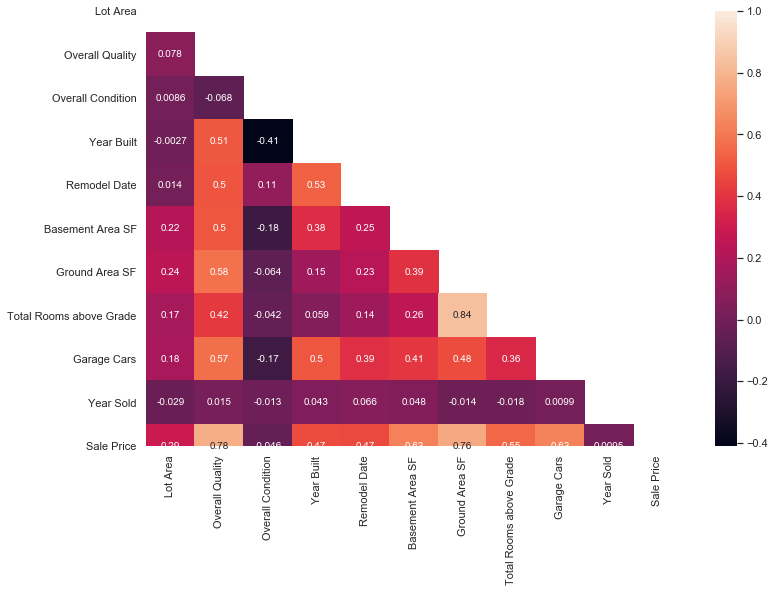

In [10]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True)

Es lassen sich einige Sacheverhalte aus dem obigen Korrelationsgraphen ableiten, es werden jedoch nur Tatsachen von Relevanz oder Tatsachen die nicht intuitiv erscheinen genannt:
    
  - Lot Area korreliert so gut wie nicht mit overall Quality, obwohl es eigentlich zu erwarten wäre, 
    dass ein Haus auf einem größeren und somit wahrscheinlich teureren Grundstück aus 
    besseren Materialien besteht
  - Overall Condition korreliert nicht mit Lot Area, obwohl zu erwarten wäre, dass ein Haus 
    mit einem größeren und vermutlich teuereren Grundstück besser gepflegt wird.
  - Neuere Häuser sind tendenziell mit besseren Materialien und Qualität gebaut, da 
    Year build mit ca. 0.5 mit Overall Quality korreliert.
  - Basement Area Square Feat korreliert nur schwach mit der gesamt Größe des Grundstücks.
  - Die Anzahl der Garagen korreliert verhältnismäßig stark mit Overall Quality.

Der wichtigste Parameter *Sale Price* korreliert am meisten mit folgenden Parametern und ist somit am stärksten durch diese beinflusst (absteigende Reihenfolge):

  - Overall Quality
  - Ground Area SF
  - Basement Area SF
  - Garage Cars
  - Total Rooms Above Grade
  - Year Built
  - Remodel Date
  - Lot Area

Sehr interessant hierbei ist, das Sale Price fast nicht mit *Overall Condition* korreliert. Weiterhin ist das verkaufsjahr praktisch irrelevant. Auch der Lot Area, also die größe des gesamten Grundstücks spielen nur eine geringe Rolle.
  
  

### Detect and Remove Outliers

In [11]:
# Seperate columns by datatype
categoricalCols = []
for i in range(len(df.columns)):
    if (df.dtypes[i] == object):
        categoricalCols.append(df.columns[i])

numericalCols = []
for i in range(len(df.columns)):
    if (df.dtypes[i] == "int64" ):
        numericalCols.append(df.columns[i])

boolCols = []
for i in range(len(df.columns)):
    if (df.dtypes[i] == "bool" ):
        boolCols.append(df.columns[i])
        
        
print('categoricalCols:', categoricalCols)
print('numericalCols:', numericalCols)
print('boolCols:', boolCols)

categoricalCols: ['Zoning Classification', 'Neighborhood', 'Dwelling Type', 'Roof Style', 'Heating Quality and Condition', 'CentralAir']
numericalCols: ['Lot Area', 'Overall Quality', 'Overall Condition', 'Year Built', 'Remodel Date', 'Basement Area SF', 'Ground Area SF', 'Total Rooms above Grade', 'Garage Cars', 'Year Sold', 'Sale Price']
boolCols: []


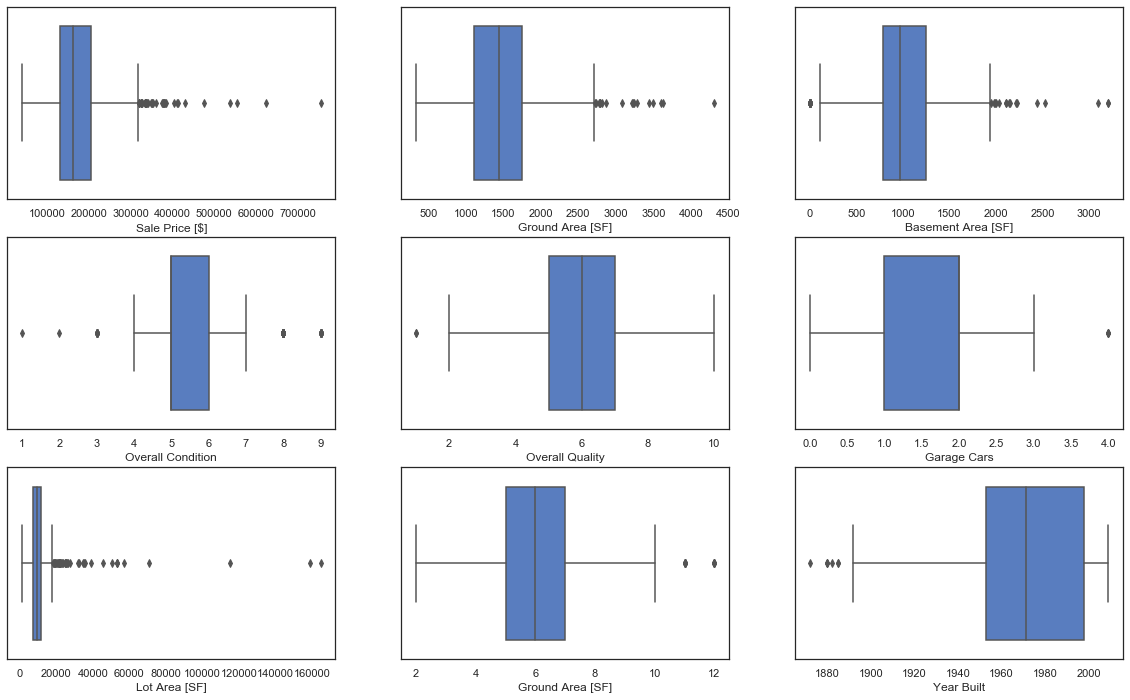

In [12]:
# setup matplotlib figure
fig, axes = plt.subplots(3, 3, sharey=False, figsize=(20,12))

sns.boxplot(x=df['Sale Price'], ax=axes[0, 0]).set(xlabel='Sale Price [$]')
sns.boxplot(x=df['Ground Area SF'], ax=axes[0, 1]).set(xlabel='Ground Area [SF]')
sns.boxplot(x=df['Basement Area SF'], ax=axes[0, 2]).set(xlabel='Basement Area [SF]')

sns.boxplot(x=df['Overall Condition'], ax=axes[1, 0])
sns.boxplot(x=df['Overall Quality'], ax=axes[1, 1])
sns.boxplot(x=df['Garage Cars'], ax=axes[1, 2])

sns.boxplot(x=df['Lot Area'], ax=axes[2, 0]).set(xlabel='Lot Area [SF]')
sns.boxplot(x=df['Total Rooms above Grade'], ax=axes[2, 1]).set(xlabel='Ground Area [SF]')
sns.boxplot(x=df['Year Built'], ax=axes[2, 2])

In [13]:
# Calculating interquartile range (IQR)
Q1 = df[numericalCols].quantile(0.25)
Q3 = df[numericalCols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Lot Area                    4267.75
Overall Quality                2.00
Overall Condition              1.00
Year Built                    45.00
Remodel Date                  36.00
Basement Area SF             459.25
Ground Area SF               647.75
Total Rooms above Grade        2.00
Garage Cars                    1.00
Year Sold                      2.00
Sale Price                 75000.00
dtype: float64


In [14]:
# finding outliers: Flase means valid, True means outlier
print((df[numericalCols] < (Q1 - 1.5 * IQR)) | (df[numericalCols] > (Q3 + 1.5 * IQR)))

     Lot Area  Overall Quality  Overall Condition  Year Built  Remodel Date  \
726     False            False              False       False         False   
469     False            False              False       False         False   
825     False            False              False       False         False   
122     False            False               True       False         False   
136     False            False              False       False         False   
..        ...              ...                ...         ...           ...   
753      True            False              False       False         False   
882      True            False              False       False         False   
208      True            False              False       False         False   
66       True            False              False       False         False   
844      True            False              False       False         False   

     Basement Area SF  Ground Area SF  Total Rooms 

In [24]:
# removing outliers
df_outliersremoved = df[~((df[numericalCols] < (Q1 - 1.5 * IQR)) | (df[numericalCols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_outliersremoved.shape

# and saving it in it's own .csv
filename = 'cleanedSet.csv'
df.to_csv(filename, sep=';')

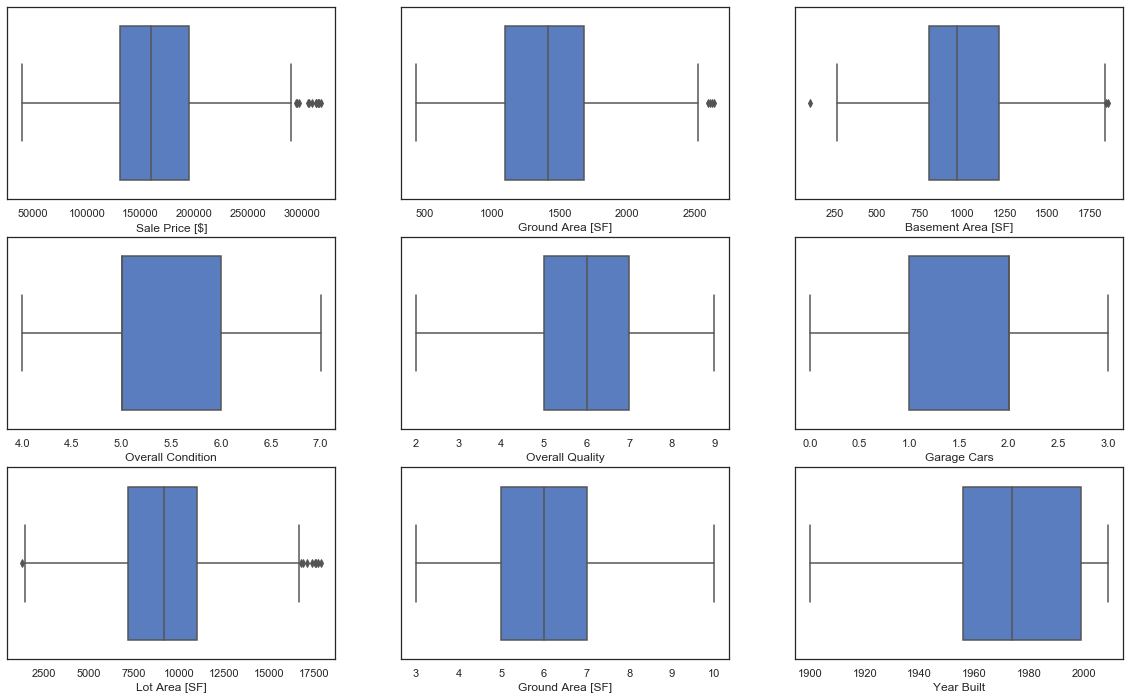

In [16]:
# boxplots for removed outliers
fig, axes = plt.subplots(3, 3, sharey=False, figsize=(20,12))

sns.boxplot(x=df_outliersremoved['Sale Price'], ax=axes[0, 0]).set(xlabel='Sale Price [$]')
sns.boxplot(x=df_outliersremoved['Ground Area SF'], ax=axes[0, 1]).set(xlabel='Ground Area [SF]')
sns.boxplot(x=df_outliersremoved['Basement Area SF'], ax=axes[0, 2]).set(xlabel='Basement Area [SF]')

sns.boxplot(x=df_outliersremoved['Overall Condition'], ax=axes[1, 0])
sns.boxplot(x=df_outliersremoved['Overall Quality'], ax=axes[1, 1])
sns.boxplot(x=df_outliersremoved['Garage Cars'], ax=axes[1, 2])

sns.boxplot(x=df_outliersremoved['Lot Area'], ax=axes[2, 0]).set(xlabel='Lot Area [SF]')
sns.boxplot(x=df_outliersremoved['Total Rooms above Grade'], ax=axes[2, 1]).set(xlabel='Ground Area [SF]')
sns.boxplot(x=df_outliersremoved['Year Built'], ax=axes[2, 2])

Um zu bestimmen welche Outlier entfernt werden sollten, müssen weitere Untersuchungen angestellt werden.
Es ist zu bemerken das nicht alle Outlier gelöscht werden, da es auch 

[(0, 5000), (0, 760000)]

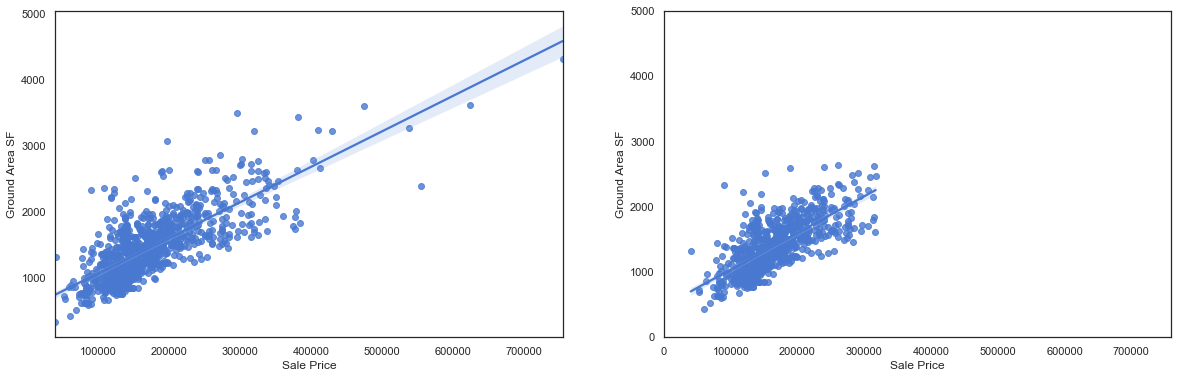

In [17]:
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(20,6))

sns.regplot(x=df['Sale Price'], y=df['Ground Area SF'], ax=axes[0])
sns.regplot(x=df_outliersremoved['Sale Price'], y=df_outliersremoved['Ground Area SF'], ax=axes[1]).set(xlim=(0,760000),ylim=(0,5000))

Es ist zu erkennen, das die Outlier für den Sale Price und Ground Area die Regression Linie nicht stark beeinflussen und können somit entfernt werden.

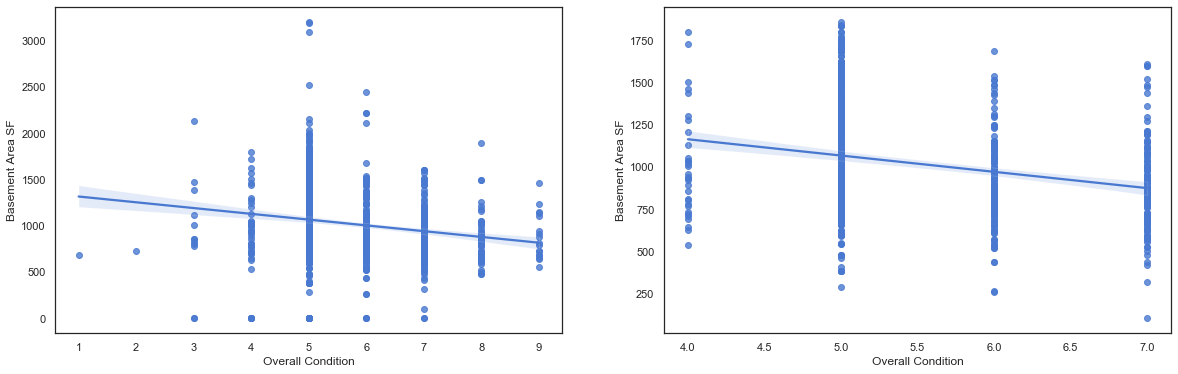

In [18]:
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(20,6))

sns.regplot(x=df['Overall Condition'], y=df['Basement Area SF'], ax=axes[0])
sns.regplot(x=df_outliersremoved['Overall Condition'], y=df_outliersremoved['Basement Area SF'], ax=axes[1])

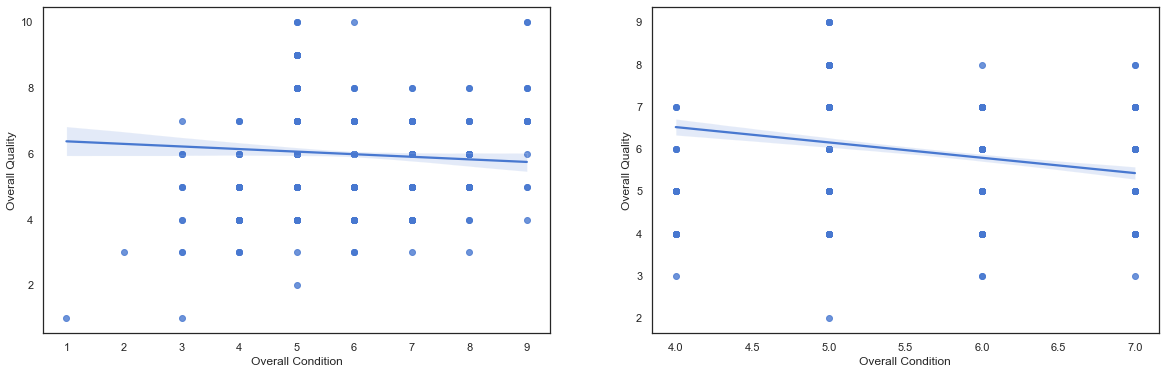

In [19]:
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(20,6))

sns.regplot(x=df['Overall Condition'], y=df['Overall Quality'], ax=axes[0])
sns.regplot(x=df_outliersremoved['Overall Condition'], y=df_outliersremoved['Overall Quality'], ax=axes[1])

Man kann erkennen, dass sich die Regressions Linie für Overall Condition und Overall Quality leicht verändert. Da die beiden Werte aber sowieso einen festen Rahmen besitzen (1 -10) ist es nicht sinnvoll diese zu entfernen. Ebenfalls ist Garage Cars ein sehr kleiner Bereich an (max 4) und sollte somit nicht entfernt werden. 

[(0, 170000), (0, 760000)]

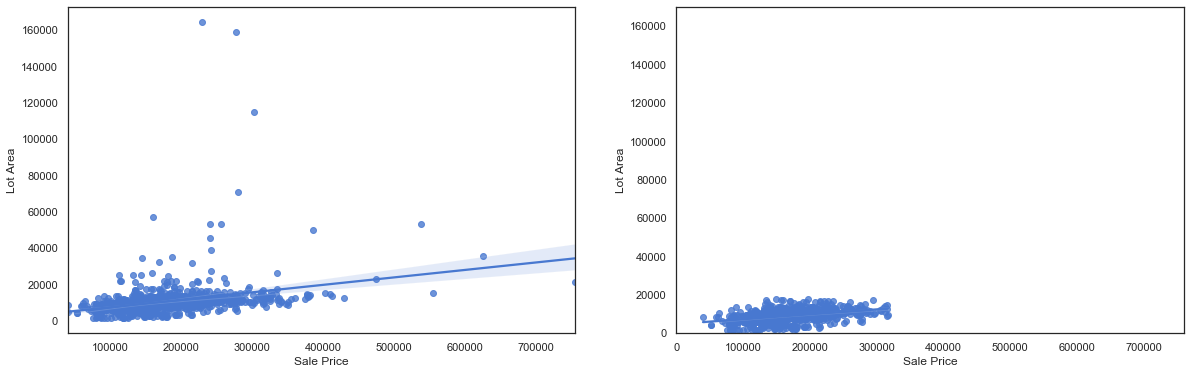

In [20]:
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(20,6))

sns.regplot(x=df['Sale Price'], y=df['Lot Area'], ax=axes[0])
sns.regplot(x=df_outliersremoved['Sale Price'], y=df_outliersremoved['Lot Area'], ax=axes[1]).set(xlim=(0,760000),ylim=(0,170000))

Auch hier verändert sich die Regrssionslinie kaum und die Outlier für Lot Area können entfernt werden.

[(0, 170000), (0, 4500)]

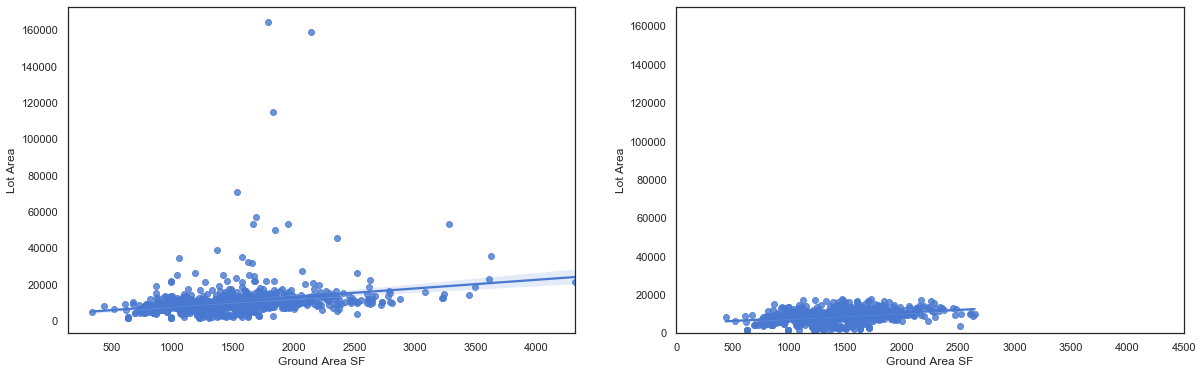

In [21]:
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(20,6))

sns.regplot(x=df['Ground Area SF'], y=df['Lot Area'], ax=axes[0])
sns.regplot(x=df_outliersremoved['Ground Area SF'], y=df_outliersremoved['Lot Area'], ax=axes[1]).set(xlim=(0,4500),ylim=(0,170000))

[(0, 170000), (0, 4500)]

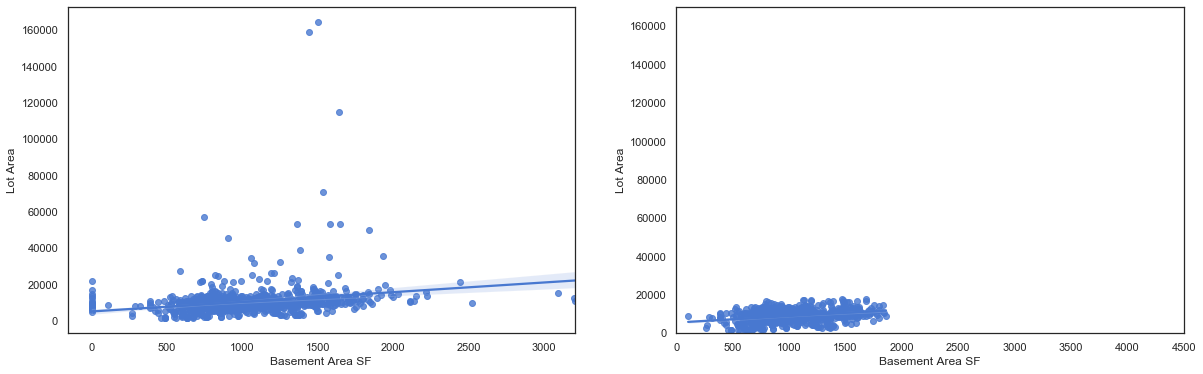

In [22]:
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(20,6))

sns.regplot(x=df['Basement Area SF'], y=df['Lot Area'], ax=axes[0])
sns.regplot(x=df_outliersremoved['Basement Area SF'], y=df_outliersremoved['Lot Area'], ax=axes[1]).set(xlim=(0,4500),ylim=(0,170000))

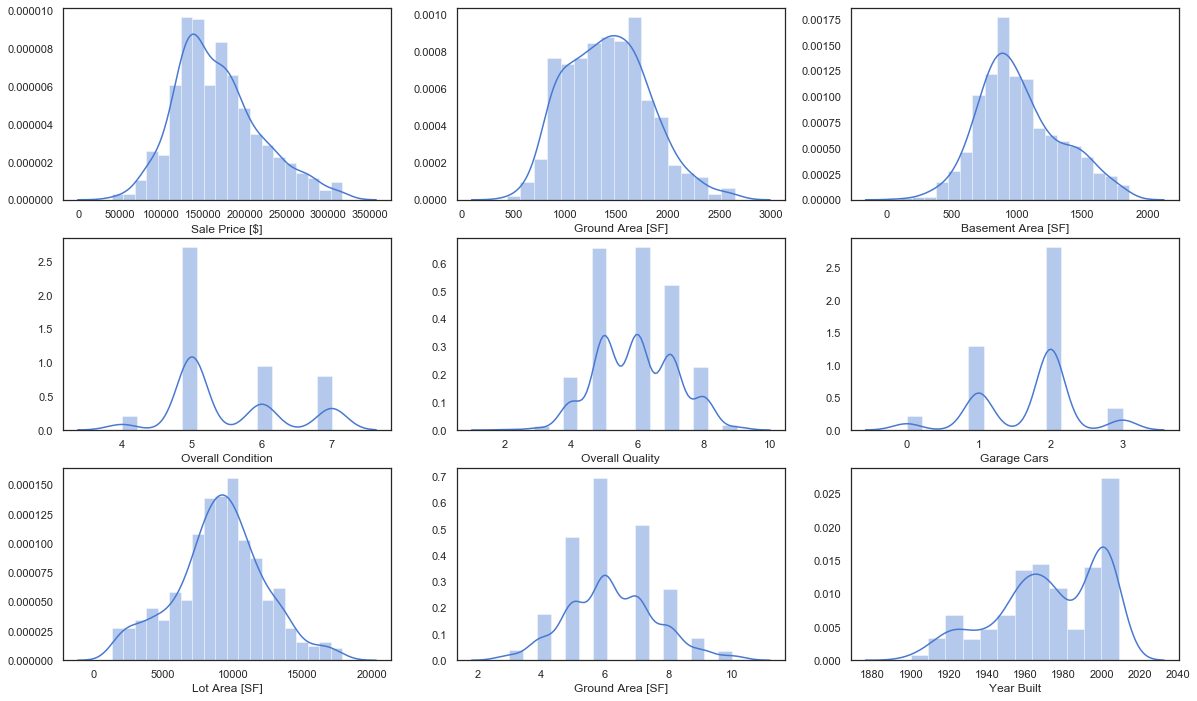

In [23]:
# boxplots for removed outliers
fig, axes = plt.subplots(3, 3, sharey=False, figsize=(20,12))

sns.distplot(df_outliersremoved['Sale Price'], ax=axes[0, 0]).set(xlabel='Sale Price [$]')
sns.distplot(df_outliersremoved['Ground Area SF'], ax=axes[0, 1]).set(xlabel='Ground Area [SF]')
sns.distplot(df_outliersremoved['Basement Area SF'], ax=axes[0, 2]).set(xlabel='Basement Area [SF]')

sns.distplot(df_outliersremoved['Overall Condition'], ax=axes[1, 0])
sns.distplot(df_outliersremoved['Overall Quality'], ax=axes[1, 1])
sns.distplot(df_outliersremoved['Garage Cars'], ax=axes[1, 2])

sns.distplot(df_outliersremoved['Lot Area'], ax=axes[2, 0]).set(xlabel='Lot Area [SF]')
sns.distplot(df_outliersremoved['Total Rooms above Grade'], ax=axes[2, 1]).set(xlabel='Ground Area [SF]')
sns.distplot(df_outliersremoved['Year Built'], ax=axes[2, 2])